In [1]:
import warnings
warnings.filterwarnings(
    action='ignore',
    category=FutureWarning
)

In [2]:
import os

import FACSPy as fp
import scanpy as sc

import numpy as np
import pandas as pd
from scipy import sparse
import anndata
from typing import Optional
from tqdm import tqdm

In [3]:
input_dir = "../"
output_dir = "../paper/figure_data/"
cell_type = "NK_cells"

In [4]:
fp.settings.default_layer = "transformed"
fp.settings.default_gate = cell_type

In [5]:
dataset = fp.read_dataset(input_dir,
                          file_name = "raw_data_CD45_gated")
dataset

AnnData object with n_obs × n_vars = 1830671 × 28
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch', 'leiden', 'B_cells', 'NK_cells', 'CD8_T_cells', 'CD4_T_cells', 'Monocytes', 'PBMC_gated', 'NK_cells_gated', 'B_cells_gated', 'CD8_T_cells_gated', 'CD4_T_cells_gated', 'Monocytes_gated', 'organ_diag'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'gate_frequencies', 'mfi_sample_ID_compensated', 'mfi_sample_ID_transformed', 'fop_sample_ID_compensated', 'fop_sample_ID_transformed', 'settings', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'NK_cells_colors', 'CD8_T_cells_colors', 'CD4_T_cells_colors', 'Monocytes_colors'
    obsm: 'X_pca', 'X_umap', 'X_umap_CD45+_transformed', 'gating'
    varm: 'PCs'
    layers: 'compensated', 'raw', 'transformed'
    obsp: 'connectivities', 'distances'

In [6]:
# for now we only keep the paired samples

sample_ids_to_keep = [
    "1", "2", "3", "4", "5", "6",
    "17", "24",
    "18", "25",
    "19", "26",
    "20", "27",
    "21", "28",
    "22", "29",
    "23", "30",
    "34", "35", "36"
]
dataset = dataset[dataset.obs["sample_ID"].isin(sample_ids_to_keep),:].copy()
dataset

AnnData object with n_obs × n_vars = 1547949 × 28
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch', 'leiden', 'B_cells', 'NK_cells', 'CD8_T_cells', 'CD4_T_cells', 'Monocytes', 'PBMC_gated', 'NK_cells_gated', 'B_cells_gated', 'CD8_T_cells_gated', 'CD4_T_cells_gated', 'Monocytes_gated', 'organ_diag'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'gate_frequencies', 'mfi_sample_ID_compensated', 'mfi_sample_ID_transformed', 'fop_sample_ID_compensated', 'fop_sample_ID_transformed', 'settings', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'NK_cells_colors', 'CD8_T_cells_colors', 'CD4_T_cells_colors', 'Monocytes_colors'
    obsm: 'X_pca', 'X_umap', 'X_umap_CD45+_transformed', 'gating'
    varm: 'PCs'
    layers: 'compensated', 'raw', 'transformed'
    obsp: 'connectivities', 'distances'

In [7]:
fp.save_dataset(dataset, file_name = os.path.join(output_dir, "dataset_PBMC"), overwrite = True)

File saved successfully


In [8]:
cells = fp.subset_gate(dataset, gate = cell_type, copy = True)
fp.sync.synchronize_dataset(cells)
cells

Found modified subsets: ['adata_obs_names', 'adata_sample_ids']
	... synchronizing metadata object to contain sample_IDs of the dataset
... synchronizing dataframe: mfi_sample_ID_compensated
     ... synchronized frame mfi_sample_ID_compensated
... synchronizing dataframe: mfi_sample_ID_transformed
     ... synchronized frame mfi_sample_ID_transformed
... synchronizing dataframe: fop_sample_ID_compensated
     ... synchronized frame fop_sample_ID_compensated
... synchronizing dataframe: fop_sample_ID_transformed
     ... synchronized frame fop_sample_ID_transformed


C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\exceptions\_exceptions.py:12: UserWarning: It was detected that the dataset was modified.Please make sure that the performed analyses are still valid. Note that if you removed whole samples, mfi/fop calculations will not be affected.
  warnings.warn(message, UserWarning)
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\synchronization\_synchronize.py:106: DataModificationWarning: 'It was detected that the dataset was modified.Please make sure that the performed analyses are still valid. Note that if you removed whole samples, mfi/fop calculations will not be affected.'
  warnings.warn('', DataModificationWarning)


AnnData object with n_obs × n_vars = 158765 × 28
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch', 'leiden', 'B_cells', 'NK_cells', 'CD8_T_cells', 'CD4_T_cells', 'Monocytes', 'PBMC_gated', 'NK_cells_gated', 'B_cells_gated', 'CD8_T_cells_gated', 'CD4_T_cells_gated', 'Monocytes_gated', 'organ_diag'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'gate_frequencies', 'mfi_sample_ID_compensated', 'mfi_sample_ID_transformed', 'fop_sample_ID_compensated', 'fop_sample_ID_transformed', 'settings', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'NK_cells_colors', 'CD8_T_cells_colors', 'CD4_T_cells_colors', 'Monocytes_colors'
    obsm: 'X_pca', 'X_umap', 'X_umap_CD45+_transformed', 'gating'
    varm: 'PCs'
    layers: 'compensated', 'raw', 'transformed'
    obsp: 'connectivities', 'distances'

In [9]:
fp.equalize_groups(cells,
                   fraction = 1,
                   on = ["diag_main", "organ"])

In [10]:
fp.convert_gate_to_obs(cells, "T")
cells = cells[cells.obs["T"] == "other",:].copy()
cells.obs.value_counts(["diag_main", "organ"])

diag_main        organ
infl. arthritis  PB       4498
healthy          PB       4497
infl. arthritis  SF       4497
Name: count, dtype: int64

In [11]:
fp.sync.synchronize_dataset(cells)

Found modified subsets: ['adata_obs_names', 'adata_obs_columns']
	... synchronizing metadata object to contain columns of the dataset
... synchronizing dataframe: mfi_sample_ID_compensated
     ... synchronized frame mfi_sample_ID_compensated
... synchronizing dataframe: mfi_sample_ID_transformed
     ... synchronized frame mfi_sample_ID_transformed
... synchronizing dataframe: fop_sample_ID_compensated
     ... synchronized frame fop_sample_ID_compensated
... synchronizing dataframe: fop_sample_ID_transformed
     ... synchronized frame fop_sample_ID_transformed


C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\exceptions\_exceptions.py:12: UserWarning: It was detected that the dataset was modified.Please make sure that the performed analyses are still valid. Note that if you removed whole samples, mfi/fop calculations will not be affected.
  warnings.warn(message, UserWarning)
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\synchronization\_synchronize.py:106: DataModificationWarning: 'It was detected that the dataset was modified.Please make sure that the performed analyses are still valid. Note that if you removed whole samples, mfi/fop calculations will not be affected.'
  warnings.warn('', DataModificationWarning)


In [12]:
fp.tl.mfi(cells)
fp.tl.mfi(cells,
          layer = "compensated")
fp.tl.fop(cells)

fp.tl.pca_samplewise(cells)

In [13]:
dimred_kwargs = {
    "exclude": None,
    "scaling": None,
    "use_only_fluo": True
}

fp.tl.pca(cells, **dimred_kwargs)

fp.tl.neighbors(cells, n_neighbors = 200, **dimred_kwargs)


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def calculate_differentiation_rank(df, markers=['CD16', 'CD56', 'CD57'], weights=None, normalize=True):
    """
    Calculate pseudotime based on expression levels of specified markers.
    
    Parameters:
    - df (pd.DataFrame): Input DataFrame containing marker expression columns.
    - markers (list of str): List of marker column names. Default is ['CD16', 'CD56', 'CD57'].
    - weights (dict): Dictionary mapping marker names to their respective weights.
                      If None, default weights are used:
                          'CD56': -1.0 (indicative of young cells)
                          'CD16': 0.8  (indicative of middle-aged to old cells)
                          'CD57': 1.0  (indicative of old cells)
    - normalize (bool): Whether to normalize pseudotime to the range [0, 1]. Default is True.
    
    Returns:
    - pd.DataFrame: Original DataFrame with added 'Pseudotime' and 'Pseudotime_Normalized' columns.
    """
    
    missing_markers = [marker for marker in markers if marker not in df.columns]
    if missing_markers:
        raise ValueError(f"The following markers are missing from the DataFrame: {missing_markers}")
    
    if df[markers].isnull().any().any():
        df_clean = df.dropna(subset=markers).copy()
        print(f"Removed {df.shape[0] - df_clean.shape[0]} rows due to missing marker expressions.")
    else:
        df_clean = df.copy()
    
    scaler = StandardScaler()
    df_clean_scaled = df_clean.copy()
    df_clean_scaled[markers] = scaler.fit_transform(df_clean[markers])
    
    if weights is None:
        # Default weights based on biological relevance
        weights = {
            'CD56': -1.0,  # Negative weight for young cells
            'CD16': 0.8,   # Positive weight for middle-aged to old cells
            'CD57': 1.0    # Positive weight for old cells
        }
        print("Using default weights:")
    else:
        print("Using user-provided weights:")
    
    for marker in markers:
        if marker not in weights:
            raise ValueError(f"Weight for marker '{marker}' not provided in weights dictionary.")
    
    for marker, weight in weights.items():
        print(f"  {marker}: {weight}")
    
    df_clean_scaled['Pseudotime'] = 0.0
    for marker in markers:
        df_clean_scaled['Pseudotime'] += df_clean_scaled[marker] * weights[marker]
    
    if normalize:
        min_max_scaler = MinMaxScaler()
        df_clean_scaled['Pseudotime_Normalized'] = min_max_scaler.fit_transform(df_clean_scaled[['Pseudotime']])
    else:
        df_clean_scaled['Pseudotime_Normalized'] = df_clean_scaled['Pseudotime']
    
    df_result = df.copy()
    df_result = df_result.loc[df_clean_scaled.index]
    df_result['Pseudotime'] = df_clean_scaled['Pseudotime'].values
    df_result['Pseudotime_Normalized'] = df_clean_scaled['Pseudotime_Normalized'].values
    
    return df_result



In [15]:
weights = {
    'CD56': -1.0,  # Negative weight for young cells
    'CD16': 0.8,   # Positive weight for middle-aged to old cells; used to be 0.5 before marker exclusion
    'CD57': 1.0    # Positive weight for old cells
}

healthy = cells[cells.obs["diag_main"] == "healthy",:].copy()

res = calculate_differentiation_rank(healthy.to_df(layer = "transformed"), weights = weights)
assert (res.index == healthy.obs.index).all()
healthy.obs["pseudotime"] = res["Pseudotime_Normalized"]

cells.obs = cells.obs.reset_index().merge(healthy.obs.reset_index()[["index", "pseudotime"]], on = "index", how = "outer").set_index("index")

Using user-provided weights:
  CD56: -1.0
  CD16: 0.8
  CD57: 1.0


In [16]:
def assign_pseudotime_to_all_cells(
    adata: anndata.AnnData,
    connectivities_key: str = "NK_cells_transformed_neighbors_connectivities",
    diag_column: str = "diag_main",
    control_label: str = "healthy",
    initial_k: int = 5,
    max_k: int = 50
) -> anndata.AnnData:
    """
    Assign pseudotime to all cells by averaging the pseudotime of their nearest control cell neighbors.
    If a cell does not have enough control neighbors within the initial_k, expand the search up to max_k.

    Parameters:
    ----------
    adata : anndata.AnnData
        The AnnData object containing single-cell data.
    connectivities_key : str, optional (default: "NK_cells_transformed_neighbors_connectivities")
        The key in `adata.obsp` where the neighbor connectivities are stored.
    diag_column : str, optional (default: "diag_main")
        The column name in `adata.obs` that specifies the diagnosis.
    control_label : str, optional (default: "healthy")
        The label that identifies healthy control cells in the `diag_column`.
    initial_k : int, optional (default: 5)
        The initial number of nearest neighbors to consider for each cell.
    max_k : int, optional (default: 50)
        The maximum number of neighbors to consider to find sufficient control cells.

    Returns:
    -------
    adata : anndata.AnnData
        The input AnnData object with updated pseudotime values for all cells.
    """
    
    # Check if required columns and keys exist
    if diag_column not in adata.obs.columns:
        raise KeyError(f"'{diag_column}' column not found in adata.obs.")
    
    if 'pseudotime' not in adata.obs.columns:
        raise KeyError("'pseudotime' column not found in adata.obs.")
    
    if connectivities_key not in adata.obsp.keys():
        raise KeyError(f"'{connectivities_key}' key not found in adata.obsp.")
    
    control_mask = adata.obs[diag_column] == control_label
    non_control_mask = ~control_mask

    num_control = control_mask.sum()
    num_non_control = non_control_mask.sum()
    print(f"Number of control cells: {num_control}")
    print(f"Number of non-control cells: {num_non_control}")
    
    if adata.obs.loc[control_mask, 'pseudotime'].isnull().any():
        raise ValueError("Some control cells have NA pseudotime values.")
    
    connectivities = adata.obsp[connectivities_key]
    
    if not sparse.isspmatrix_csr(connectivities):
        connectivities = connectivities.tocsr()
    
    total_neighbors = connectivities.shape[1]
    print(f"Total neighbors available per cell: {total_neighbors}")
    
    if initial_k > total_neighbors:
        raise ValueError(f"Initial k ({initial_k}) is greater than the total neighbors available ({total_neighbors}).")
    
    if max_k > total_neighbors:
        print(f"Warning: max_k ({max_k}) is greater than the total neighbors available ({total_neighbors}). Setting max_k to {total_neighbors}.")
        max_k = total_neighbors
    
    pseudotime_new = adata.obs['pseudotime'].values.copy()
    control_indices = np.where(control_mask)[0]
    control_pseudotime = adata.obs.loc[control_mask, 'pseudotime'].values
    
    non_control_indices = np.where(non_control_mask)[0]
    num_assigned = 0
    num_unassigned = 0
    unassigned_cells = []
    print("Assigning pseudotime to non-control cells...")
    for cell_idx in tqdm(non_control_indices, desc="Processing cells"):
        found_pseudotimes = []
        current_k = initial_k

        while len(found_pseudotimes) < 5 and current_k <= max_k:
            # Get the start and end indices for the current cell's neighbors
            start_ptr = connectivities.indptr[cell_idx]
            end_ptr = connectivities.indptr[cell_idx + 1]
            
            # Extract neighbor indices up to current_k
            neighbor_indices = connectivities.indices[start_ptr : start_ptr + current_k]
            
            # Identify which neighbors are control cells
            # Handle cases where current_k exceeds the number of available neighbors
            actual_k = min(current_k, end_ptr - start_ptr)
            if actual_k <= 0:
                break  # No neighbors to process
            
            neighbor_indices = connectivities.indices[start_ptr : start_ptr + actual_k]
            control_neighbor_mask = control_mask.iloc[neighbor_indices].values
            control_neighbor_indices = neighbor_indices[control_neighbor_mask]
            
            # Retrieve pseudotime values of control neighbors
            neighbor_pseudotime = adata.obs.iloc[control_neighbor_indices]['pseudotime'].values
            
            # Accumulate found pseudotimes without duplication
            found_pseudotimes = list(set(found_pseudotimes + neighbor_pseudotime.tolist()))
            
            if len(found_pseudotimes) >= 5:
                # Take the first 5 unique pseudotimes
                pseudotime_values = found_pseudotimes[:5]
                average_pseudotime = np.mean(pseudotime_values)
                pseudotime_new[cell_idx] = average_pseudotime
                num_assigned += 1
                break
            else:
                # Increase k to search more neighbors
                current_k += initial_k
        
        if len(found_pseudotimes) < 5:
            if len(found_pseudotimes) > 0:
                # Assign the average of available pseudotimes
                average_pseudotime = np.mean(found_pseudotimes)
                pseudotime_new[cell_idx] = average_pseudotime
                num_assigned += 1
            else:
                # No control neighbors found within max_k
                pseudotime_new[cell_idx] = np.nan
                num_unassigned += 1
                unassigned_cells.append(cell_idx)
    
    print(f"Pseudotime assigned to {num_assigned} non-control cells.")
    if num_unassigned > 0:
        print(f"Pseudotime could not be assigned to {num_unassigned} non-control cells (no control neighbors within max_k).")
        
        # Retrieve 'diag_main' values for unassigned cells
        unassigned_diag_main = adata.obs.iloc[unassigned_cells]["organ_diag"]
        diag_counts = unassigned_diag_main.value_counts()
        
        print("\nUnassigned cells per 'diag_main' group:")
        print(diag_counts)
    
    # Update the 'pseudotime' column in adata.obs
    adata.obs['pseudotime'] = pseudotime_new
    
    return adata


In [23]:
#### added for testing if CD16/CD56/CD57 make a difference
#fp.tl.pca(cells, exclude = ["CD16", "CD56", "CD57"], scaling = None, use_only_fluo = True)
#fp.tl.neighbors(cells, exclude = ["CD16", "CD56", "CD57"], n_neighbors = 200, scaling = None, use_only_fluo = True)

In [24]:
#cells_pt = cells.copy()
#cells_pt = assign_pseudotime_to_all_cells(cells, max_k = 50)

Number of control cells: 4497
Number of non-control cells: 8995
Total neighbors available per cell: 13492
Assigning pseudotime to non-control cells...


Processing cells: 100%|███████████████████████████████████████████████████████████| 8995/8995 [00:48<00:00, 187.17it/s]

Pseudotime assigned to 8754 non-control cells.
Pseudotime could not be assigned to 241 non-control cells (no control neighbors within max_k).

Unassigned cells per 'diag_main' group:
organ_diag
infl. arthritis: SF    141
infl. arthritis: PB    100
healthy: PB              0
Name: count, dtype: int64


In [17]:
cells_pt = cells.copy()
cells_pt = assign_pseudotime_to_all_cells(cells, max_k = 200)

Number of control cells: 4497
Number of non-control cells: 8995
Total neighbors available per cell: 13492
Assigning pseudotime to non-control cells...


Processing cells: 100%|███████████████████████████████████████████████████████████| 8995/8995 [00:29<00:00, 299.93it/s]

Pseudotime assigned to 8773 non-control cells.
Pseudotime could not be assigned to 222 non-control cells (no control neighbors within max_k).

Unassigned cells per 'diag_main' group:
organ_diag
infl. arthritis: SF    138
infl. arthritis: PB     84
healthy: PB              0
Name: count, dtype: int64


In [25]:
assert (cells_pt.obs.index == cells.obs.index).all()
cells.obs["pseudotime"] = cells_pt.obs["pseudotime"].tolist()

In [26]:
fp.tl.pca(cells, **dimred_kwargs)

fp.tl.neighbors(cells, **dimred_kwargs)

fp.tl.leiden(cells, **dimred_kwargs)

fp.tl.umap(cells, **dimred_kwargs)

fp.tl.diffmap(cells, **dimred_kwargs)
cells.obsm["X_diffmap_NK_cells_transformed"] = cells.obsm["X_diffmap_NK_cells_transformed"][:,1:]

In [27]:
cells.obs

,sample_ID,file_name,group_fd,internal_id,organ,staining,diag_main,diag_fine,donor_id,material,...,PBMC_gated,NK_cells_gated,B_cells_gated,CD8_T_cells_gated,CD4_T_cells_gated,Monocytes_gated,organ_diag,T,pseudotime,NK_cells_transformed_leiden
index,,,,,,,,,,,,,,,,,,,,,
94427-0,1,3742.fcs,HC,3742,PB,stained,healthy,healthy,3742,PBMC,...,PBMC_gated,NK_cells_gated,other,other,other,other,healthy: PB,other,0.563848,1
36239-33,34,2306.fcs,HC,2306,PB,stained,healthy,healthy,2306,PBMC,...,PBMC_gated,NK_cells_gated,other,other,other,other,healthy: PB,other,0.436206,13
182661-4,5,6042.fcs,HC,6042,PB,stained,healthy,healthy,6042,PBMC,...,PBMC_gated,NK_cells_gated,other,other,other,other,healthy: PB,other,0.624448,1
70976-0,1,3742.fcs,HC,3742,PB,stained,healthy,healthy,3742,PBMC,...,PBMC_gated,NK_cells_gated,other,other,other,other,healthy: PB,other,0.527630,3
168723-5,6,6840.fcs,HC,6840,PB,stained,healthy,healthy,6840,PBMC,...,PBMC_gated,NK_cells_gated,other,other,other,other,healthy: PB,other,0.732236,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116253-22,23,DO17.fcs,SF,DO17,SF,stained,infl. arthritis,seroneg. RA,UKHD_SR_13,SFI,...,PBMC_gated,NK_cells_gated,other,other,other,other,infl. arthritis: SF,other,0.474650,7
105543-17,18,DO12.fcs,SF,DO12,SF,stained,infl. arthritis,seropos. RA,UKHD_SR_2,SFI,...,PBMC_gated,NK_cells_gated,other,other,other,other,infl. arthritis: SF,other,0.402756,0
42654-19,20,DO14.fcs,SF,DO14,SF,stained,infl. arthritis,PMR,UKHD_SR_5,SFI,...,PBMC_gated,NK_cells_gated,other,other,other,other,infl. arthritis: SF,other,0.539318,4


In [28]:
fp.save_dataset(cells, file_name = os.path.join(output_dir, "dataset_NK_preprocessed"), overwrite = True)

File saved successfully


In [22]:
cells

AnnData object with n_obs × n_vars = 13492 × 28
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch', 'leiden', 'B_cells', 'NK_cells', 'CD8_T_cells', 'CD4_T_cells', 'Monocytes', 'PBMC_gated', 'NK_cells_gated', 'B_cells_gated', 'CD8_T_cells_gated', 'CD4_T_cells_gated', 'Monocytes_gated', 'organ_diag', 'T', 'pseudotime', 'NK_cells_transformed_leiden'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'gate_frequencies', 'mfi_sample_ID_compensated', 'mfi_sample_ID_transformed', 'fop_sample_ID_compensated', 'fop_sample_ID_transformed', 'settings', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'NK_cells_colors', 'CD8_T_cells_colors', 'CD4_T_cells_colors', 'Monocytes_colors', 'pca_NK_cells_transformed', 'NK_cells_transformed_neighbors', 'NK_cells_transformed_leiden', 'umap_NK_cells_transformed', 'N

In [23]:
sf = cells[cells.obs["organ"] == "SF",:].copy()
fp.sync.synchronize_dataset(sf)

Found modified subsets: ['adata_obs_names', 'adata_sample_ids', 'adata_obs_columns']
	... synchronizing metadata object to contain sample_IDs of the dataset
	... synchronizing metadata object to contain columns of the dataset
... synchronizing dataframe: mfi_sample_ID_compensated
     ... synchronized frame mfi_sample_ID_compensated
... synchronizing dataframe: mfi_sample_ID_transformed
     ... synchronized frame mfi_sample_ID_transformed
... synchronizing dataframe: fop_sample_ID_compensated
     ... synchronized frame fop_sample_ID_compensated
... synchronizing dataframe: fop_sample_ID_transformed
     ... synchronized frame fop_sample_ID_transformed


C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\exceptions\_exceptions.py:12: UserWarning: It was detected that the dataset was modified.Please make sure that the performed analyses are still valid. Note that if you removed whole samples, mfi/fop calculations will not be affected.
  warnings.warn(message, UserWarning)
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\synchronization\_synchronize.py:106: DataModificationWarning: 'It was detected that the dataset was modified.Please make sure that the performed analyses are still valid. Note that if you removed whole samples, mfi/fop calculations will not be affected.'
  warnings.warn('', DataModificationWarning)


In [24]:
dimred_kwargs = {
    "scaling": None,
    "exclude": None,
    "use_only_fluo": True
}

fp.tl.pca(sf, **dimred_kwargs)
fp.tl.neighbors(sf, **dimred_kwargs)
fp.tl.leiden(sf, resolution = 0.5, **dimred_kwargs)
fp.tl.umap(sf, **dimred_kwargs)
fp.tl.diffmap(sf, **dimred_kwargs)
sf.obsm["X_diffmap_NK_cells_transformed"] = sf.obsm["X_diffmap_NK_cells_transformed"][:,1:]

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


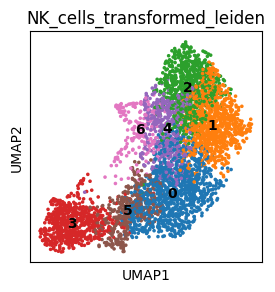

In [25]:
fp.pl.umap(sf, color = "NK_cells_transformed_leiden", legend_loc = "on data")

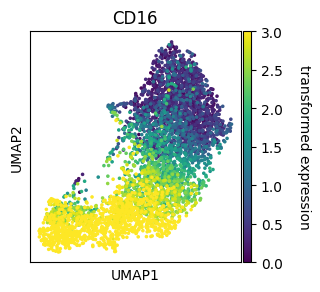

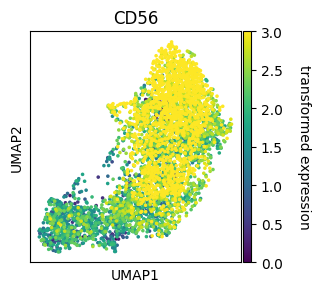

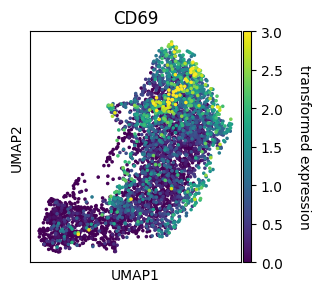

In [26]:
for marker in ["CD16", "CD56", "CD69"]:
    if sf.var.loc[sf.var["pns"] == marker, "type"].iloc[0] != "fluo":
        continue
    fp.pl.umap(sf, color = marker, vmin = 0, vmax = 3)

In [27]:
sf.obs["leiden_group"] = sf.obs["NK_cells_transformed_leiden"].map({"0": "metacluster 2",
                                                                    "1": "metacluster 3",
                                                                    "2": "metacluster 3",
                                                                    "3": "metacluster 1",
                                                                    "4": "metacluster 3",
                                                                    "5": "metacluster 1",
                                                                    "6": "metacluster 3",
                                                                    "7": "metacluster 1"})
sf.obs["leiden_group"] = sf.obs["leiden_group"].astype("category")

In [28]:
fp.tl.mfi(sf,
          layer = "compensated",
          groupby = "leiden_group",
          aggregate = False)

In [29]:
fp.save_dataset(sf, file_name = os.path.join(output_dir, "dataset_NK_SF_preprocessed"), overwrite = True)

File saved successfully


In [32]:
fp.settings.default_layer = "transformed"
fp.settings.default_gate = "CD8_T_cells"

cd8_t_cells = fp.subset_gate(dataset, "CD8_T_cells", copy = True)
fp.equalize_groups(cd8_t_cells,
                   fraction = 1,
                   on = ["diag_main", "organ"])
fp.sync.synchronize_dataset(cd8_t_cells)
print(cd8_t_cells.obs.value_counts(["diag_main", "organ"]))

dimred_kwargs = {
    "scaling": None,
    "exclude": None,
    "use_only_fluo": True
}

fp.tl.pca_samplewise(cd8_t_cells)
fp.tl.mfi(cd8_t_cells)
fp.tl.pca(cd8_t_cells, **dimred_kwargs)
fp.tl.neighbors(cd8_t_cells, **dimred_kwargs)
fp.tl.leiden(cd8_t_cells, resolution = 0.5, **dimred_kwargs)
fp.tl.umap(cd8_t_cells, **dimred_kwargs)
fp.tl.diffmap(cd8_t_cells, **dimred_kwargs)
cd8_t_cells.obsm["X_diffmap_CD8_T_cells_transformed"] = cd8_t_cells.obsm["X_diffmap_CD8_T_cells_transformed"][:,1:]

fp.save_dataset(cd8_t_cells, file_name = os.path.join(output_dir, "dataset_CD8T_preprocessed"), overwrite = True)

Found modified subsets: ['adata_obs_names', 'adata_sample_ids']
	... synchronizing metadata object to contain sample_IDs of the dataset
... synchronizing dataframe: mfi_sample_ID_compensated
     ... synchronized frame mfi_sample_ID_compensated
... synchronizing dataframe: mfi_sample_ID_transformed
     ... synchronized frame mfi_sample_ID_transformed
... synchronizing dataframe: fop_sample_ID_compensated
     ... synchronized frame fop_sample_ID_compensated
... synchronizing dataframe: fop_sample_ID_transformed
     ... synchronized frame fop_sample_ID_transformed
diag_main        organ
healthy          PB       3594
infl. arthritis  PB       3594
                 SF       3594
Name: count, dtype: int64


C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\exceptions\_exceptions.py:12: UserWarning: It was detected that the dataset was modified.Please make sure that the performed analyses are still valid. Note that if you removed whole samples, mfi/fop calculations will not be affected.
  warnings.warn(message, UserWarning)
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\synchronization\_synchronize.py:106: DataModificationWarning: 'It was detected that the dataset was modified.Please make sure that the performed analyses are still valid. Note that if you removed whole samples, mfi/fop calculations will not be affected.'
  warnings.warn('', DataModificationWarning)


File saved successfully


In [33]:
fp.settings.default_layer = "transformed"
fp.settings.default_gate = "CD4_T_cells"

cd4_t_cells = fp.subset_gate(dataset, "CD4_T_cells", copy = True)
fp.equalize_groups(cd4_t_cells,
                   fraction = 1,
                   on = ["diag_main", "organ"])
fp.sync.synchronize_dataset(cd4_t_cells)
print(cd4_t_cells.obs.value_counts(["diag_main", "organ"]))

dimred_kwargs = {
    "scaling": None,
    "exclude": None,
    "use_only_fluo": True
}

fp.tl.pca_samplewise(cd4_t_cells)
fp.tl.mfi(cd4_t_cells)
fp.tl.pca(cd4_t_cells, **dimred_kwargs)
fp.tl.neighbors(cd4_t_cells, **dimred_kwargs)
fp.tl.leiden(cd4_t_cells, resolution = 0.5, **dimred_kwargs)
fp.tl.umap(cd4_t_cells, **dimred_kwargs)
fp.tl.diffmap(cd4_t_cells, **dimred_kwargs)
cd4_t_cells.obsm["X_diffmap_CD4_T_cells_transformed"] = cd4_t_cells.obsm["X_diffmap_CD4_T_cells_transformed"][:,1:]

fp.save_dataset(cd4_t_cells, file_name = os.path.join(output_dir, "dataset_CD4T_preprocessed"), overwrite = True)

Found modified subsets: ['adata_obs_names', 'adata_sample_ids']
	... synchronizing metadata object to contain sample_IDs of the dataset
... synchronizing dataframe: mfi_sample_ID_compensated
     ... synchronized frame mfi_sample_ID_compensated
... synchronizing dataframe: mfi_sample_ID_transformed
     ... synchronized frame mfi_sample_ID_transformed
... synchronizing dataframe: fop_sample_ID_compensated
     ... synchronized frame fop_sample_ID_compensated
... synchronizing dataframe: fop_sample_ID_transformed
     ... synchronized frame fop_sample_ID_transformed
diag_main        organ
healthy          PB       10429
infl. arthritis  PB       10429
                 SF       10429
Name: count, dtype: int64


C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\exceptions\_exceptions.py:12: UserWarning: It was detected that the dataset was modified.Please make sure that the performed analyses are still valid. Note that if you removed whole samples, mfi/fop calculations will not be affected.
  warnings.warn(message, UserWarning)
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\synchronization\_synchronize.py:106: DataModificationWarning: 'It was detected that the dataset was modified.Please make sure that the performed analyses are still valid. Note that if you removed whole samples, mfi/fop calculations will not be affected.'
  warnings.warn('', DataModificationWarning)


File saved successfully


In [43]:
fp.sync.synchronize_dataset(dataset)

Found modified subsets: ['adata_obs_names', 'adata_sample_ids']
	... synchronizing metadata object to contain sample_IDs of the dataset


C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\exceptions\_exceptions.py:12: UserWarning: It was detected that the dataset was modified.Please make sure that the performed analyses are still valid. Note that if you removed whole samples, mfi/fop calculations will not be affected.
  warnings.warn(message, UserWarning)
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\synchronization\_synchronize.py:106: DataModificationWarning: 'It was detected that the dataset was modified.Please make sure that the performed analyses are still valid. Note that if you removed whole samples, mfi/fop calculations will not be affected.'
  warnings.warn('', DataModificationWarning)


... synchronizing dataframe: mfi_sample_ID_compensated
     ... synchronized frame mfi_sample_ID_compensated
... synchronizing dataframe: mfi_sample_ID_transformed
     ... synchronized frame mfi_sample_ID_transformed
... synchronizing dataframe: fop_sample_ID_compensated
     ... synchronized frame fop_sample_ID_compensated
... synchronizing dataframe: fop_sample_ID_transformed
     ... synchronized frame fop_sample_ID_transformed


In [53]:
dataset.obs[["sample_ID", "organ_diag"]].drop_duplicates()["organ_diag"].value_counts()

organ_diag
healthy: PB            9
infl. arthritis: PB    7
infl. arthritis: SF    7
Name: count, dtype: int64